In [ ]:
# Importing all the necessary libraries

import cv2                                            
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import pandas as pd
from PIL import Image
import pytesseract

In [ ]:
# To upload test images from the device

uploaded = files.upload()

Saving Test_image1.png to Test_image1.png
Saving Test_image2.png to Test_image2.png
Saving Test_image3.png to Test_image3.png
Saving Test_image4.png to Test_image4.png


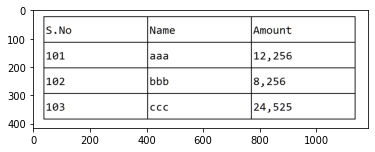

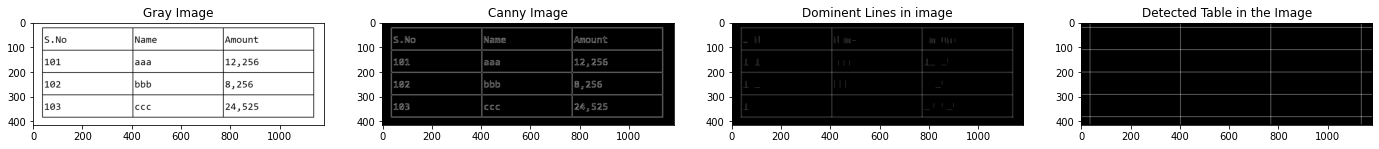

,COLUMN1,COLUMN2,COLUMN3
0,S.No,Name,Amount
1,101,aaa,"12,256"
2,102,bbb,"8,256"
3,103,ccc,"24,525"


In [ ]:
######################################################################################################################################
# TEST SAMPLE 1
######################################################################################################################################

# Reading the image and plotting the result

img1 = cv2.imread('Test_image1.png')

plt.imshow(img1)
plt.show()

# The cells and its coordinates are obtained using the Detect_table function.

countours1, boundingBoxes1 = Detect_table(img1)

# Extracting the text 

text_data1 = Detect_Text(img1,countours1, boundingBoxes1)

# Showing result
text_data1

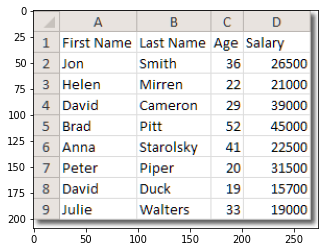

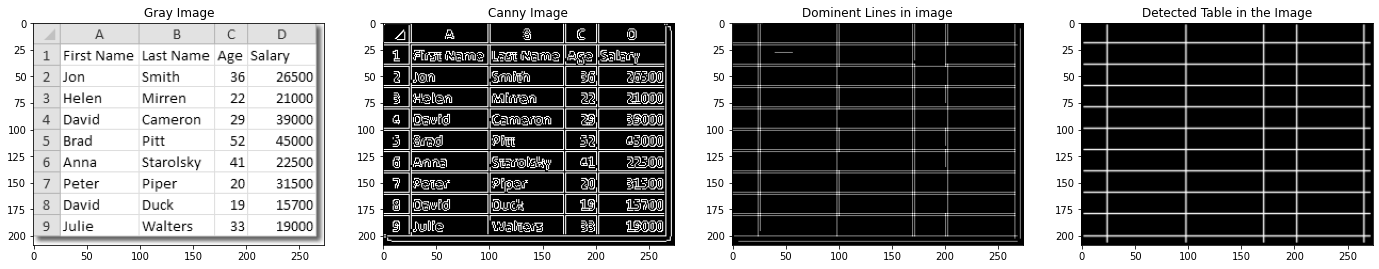

,COLUMN1,COLUMN2,COLUMN3,COLUMN4
0,FirstName.,LastName,Age,Salary
1,Jon,Smith,36,26500
2,‘Helen.,Mirren,22,21000
3,David,Cameron,29,39000
4,Brad,Pitt,52,45000
5,Anna,Starolsky,41,00
6,Peter,Piper,20,31500
7,David,Duck,19,15700
8,Julie,Walters.,"33,",19000


In [ ]:
######################################################################################################################################
# TEST SAMPLE 2
######################################################################################################################################

# Reading the image and plotting the result

img2 = cv2.imread('Test_image2.png')

plt.imshow(img2)
plt.show()

# The cells and its coordinates are obtained using the Detect_table function.

countours2, boundingBoxes2 = Detect_table(img2)

# Extracting the text 

text_data2 = Detect_Text(img2,countours2, boundingBoxes2)

# Showing result
text_data2

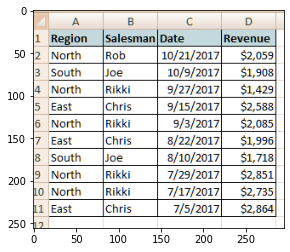

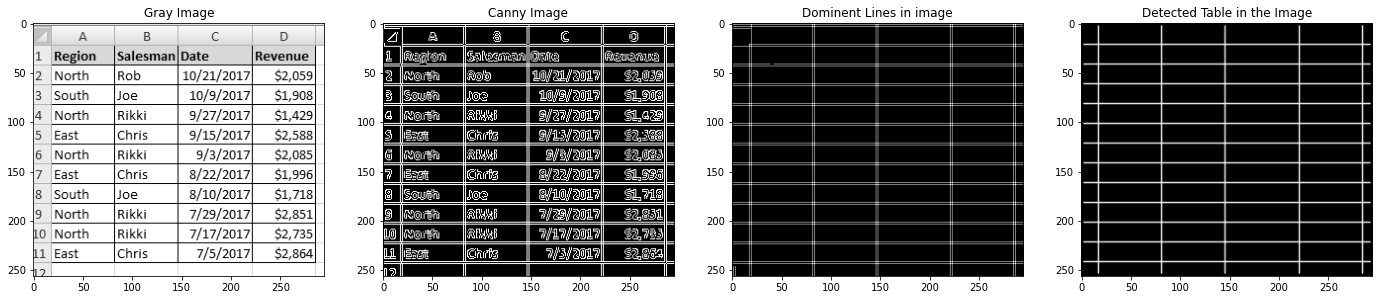

,COLUMN1,COLUMN2,COLUMN3,COLUMN4
0,Region,Salesman,Date,Revenue.
1,North,Rob,10/21/2017,"$2,059"
2,South,oe,10/9/2017,"$1,908"
3,North,Rikki,9/27/2017,"$1,429"
4,East,Chris.,9/15/2017,"|$2,588"
5,North,Rikki,9/3/2017,"|$2,085"
6,East,Chris.,3/22/2017,"$1,996"
7,South,oe,8/10/2017,"$1,718"
8,North,Rikki,7/29/2017,"$2,851"
9,North,Rikki,7/17/2017,"$2,735"


In [ ]:
######################################################################################################################################
# TEST SAMPLE 3
######################################################################################################################################

# Reading the image and plotting the result

img3 = cv2.imread('Test_image3.png')

plt.imshow(img3)
plt.show()

# The cells and its coordinates are obtained using the Detect_table function.

countours3, boundingBoxes3 = Detect_table(img3)

# Extracting the text 

text_data3 = Detect_Text(img3,countours3, boundingBoxes3)

# Showing result
text_data3

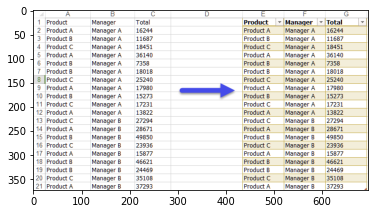

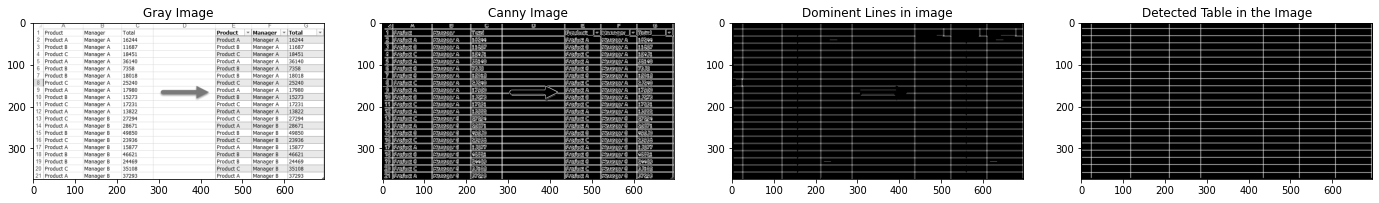

,COLUMN1,COLUMN2,COLUMN3,COLUMN4,COLUMN5,COLUMN6,COLUMN7
0,Product,Manager,Total,re,Product¥,Manager»*,Total+
1,ProductA,ManagerA,16244,re,ProductA,‘ManagerA,16244
2,ProductB,ManagerA,11687,re,ProductB,‘ManagerA,11687
3,ProductC,ManagerA,18451,re,ProductC,‘ManagerA,18451
4,ProductA,ManagerA,36140,re,ProductA,‘ManagerA,36140
5,ProductB,ManagerA,8,re,ProductB,‘ManagerA,7358
6,ProductB,ManagerA,18018,re,ProductB,‘ManagerA,18018
7,ProductC,ManagerA,25240,re,ProductC,‘ManagerA,25240
8,ProductA,ManagerA,17980,ae,ProductA,‘ManagerA,17980
9,ProductB,ManagerA,15273,,ProductB,‘ManagerA,15273


In [ ]:
######################################################################################################################################
# TEST SAMPLE 4
######################################################################################################################################

# Reading the image and plotting the result

img4 = cv2.imread('Test_image4.png')

plt.imshow(img4)
plt.show()

# The cells and its coordinates are obtained using the Detect_table function.

countours4, boundingBoxes4 = Detect_table(img4)

# Extracting the text 

text_data4 = Detect_Text(img4,countours4, boundingBoxes4)

# Showing result
text_data4

In [ ]:
###############################################################################################################################################################################################################
# This function detects the table, its rows and columns
###############################################################################################################################################################################################################

def Detect_table(img):

  ###############################################################################################################################################################################################################
  # STEP - 1 - This step involves converting the input image to gray level and apply canny edge detector on it
  ###############################################################################################################################################################################################################
  
  # Converting the color image to Gray Scale
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  # Using Canny edge detection to highlight the horizontal and vertical lines
  canny = cv2.Canny(gray,80,150)

  ###############################################################################################################################################################################################################
  # STEP - 2 - Morphological operations are performed on the image obtained from Step 1
  ###############################################################################################################################################################################################################
  
  # Dilating and eroding the above image to make the lines more prominent

  vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))                              # This generated a vertical structuring element for erosion and dilation of size (1,5)
  ver_eroded_image = cv2.erode(canny, vertical_kernel, iterations=3)                              # Eroding the canny image with vertical kernel
  vertical_dilate = cv2.dilate(ver_eroded_image, vertical_kernel, iterations=4)                    # Dilating the image with vertical kernel. This will make vertical lines more prominent

  hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))                                  # This generated a horizontal structuring element for erosion and dilation of size (5,1)
  hor_eroded_image = cv2.erode(canny, hor_kernel, iterations=3)                                   # Eroding the canny image with horizontal kernel
  horizontal_dilate = cv2.dilate(hor_eroded_image, hor_kernel, iterations=4)                       # Dilating the image with horizontal kernel. This will make horizontal lines more prominent

  vertical_horizontal_lines = cv2.addWeighted(vertical_dilate, 0.5, horizontal_dilate, 0.5, 0.0)    # Adding the result obtained by vertical and horizontal morphological operations
  
  ###############################################################################################################################################################################################################
  # STEP - 3 - The next step is to detect all the lines present in the image
  ###############################################################################################################################################################################################################
  
  # Using Probabilistic Hough Transform to detect lines

  rho = 2                                                                                         # rho - Distance resolution of the accumulator in pixels.
  theta = np.pi/180                                                                               # theta - Angle resolution of the accumulator in radians
  threshold = 8                                                                                   # threshold - Accumulator threshold parameter. Only those lines are returned that get enough votes
  minLinLength = 50                                                                               # minLinLength - Minimum line length. Line segments shorter than that are rejected
  maxLineGap = 10                                                                                  # maxLineGap - Maximum allowed gap between points on the same line to link them

  LinesP = cv2.HoughLinesP(vertical_horizontal_lines,rho,theta,threshold,None,minLinLength,maxLineGap) # This will return coordinates of lines Detection 

  ###############################################################################################################################################################################################################
  # STEP - 4 - This step involves separating the horizontal and vertical lines from the lines obtained in Step 3. and removing overlapping lines
  ###############################################################################################################################################################################################################
  
  # Separating horizontal and vertical lines. This is done by checking the coordinates of the lines. A function is defined to separate horizontal and vertical lines.
  horizontal_lines = []
  vertical_lines = []

  if LinesP is not None:
    for i in range(0,len(LinesP)):
      l = LinesP[i][0]
      if(is_vertical(l)):
        vertical_lines.append(l)
      elif(is_horizontal(l)):
        horizontal_lines.append(l)
  
  # There may be some overlapping lines or same lines which are very close by, This can be due to thickness of lines in original image. It is important to remove these overlapping lines. A function is defined to do this process
  horizontal_lines = overlapping_filter(horizontal_lines, 1)
  vertical_lines = overlapping_filter(vertical_lines, 0)

  ###############################################################################################################################################################################################################
  # STEP - 5 - This step involves drawing the detected horizontal and vertical lines in an blank image. This is done to find out the cells in the table.
  ###############################################################################################################################################################################################################

  # The coordinates of horizontal and vertical lines are stored separately. To obtain the cells of the table
  blank_img = np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)                             # A blank image of same dimension as original image is created and detected table will be drawn on this

  for i, line in enumerate(horizontal_lines):
    if(abs(line[2]-line[0])>0.05*img.shape[1]):                                                  
      cv2.line(blank_img,(0,line[1]),(img.shape[1],line[3]),(255,255,255),1,cv2.LINE_AA)        # Drawing horizontal lines on the blank image

  for i, line in enumerate(vertical_lines):
    if(abs(line[3]-line[1])>0.05*img.shape[0]):
      cv2.line(blank_img,(line[0],0),(line[2],img.shape[0]),(255,255,255),1,cv2.LINE_AA)        # Drawing vertical lines on the blank image

  ###############################################################################################################################################################################################################
  # STEP - 6 - This step involves detecting the contours, i,e,cells in a table. Each cell in a table stores some data
  ###############################################################################################################################################################################################################

  # Finding the contours i.e.cells from the table detected 
  contours, hierarchy = cv2.findContours(blank_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     # This function return all the contours found in the image
  boundingBoxes = []                                                                            # This will store the coordinates of bounding boxes of a contour, since we know that a cell in table is rectangular in shape
  contour_new = []                                                                              # This is to store all the contours except for the largest contour, i.e. entire image
  for contour in contours:  
    if(cv2.contourArea(contour)<(0.65*img.shape[0]*img.shape[1])):                              # Checking the area of the contour. If it more than 65% of the image area, the contour is rejected
      boundingBoxes.append(cv2.boundingRect(contour))
      contour_new.append(contour)

  # Sorting the contours in increasing order of x and then y
  (contours, boundingBoxes) = zip(*sorted(zip(contour_new, boundingBoxes),key=lambda x:x[1][1],reverse = False))

  ###############################################################################################################################################################################################################
  # STEP - 7 - Plotting the results
  ###############################################################################################################################################################################################################

  # Plotting the result from all step
  plt.figure(figsize = (24,10))

  plt.subplot(141)
  plt.imshow(gray,cmap='gray')
  plt.title('Gray Image')

  plt.subplot(142)
  plt.imshow(canny,cmap='gray')
  plt.title('Canny Image')

  plt.subplot(143)
  plt.imshow(vertical_horizontal_lines,cmap='gray')
  plt.title('Dominent Lines in image')

  plt.subplot(144)
  plt.imshow(blank_img,cmap='gray')
  plt.title('Detected Table in the Image')

  plt.show()

  ###############################################################################################################################################################################################################
  # STEP - 8 - Returning the cells detected from the table
  ###############################################################################################################################################################################################################

  return (contours, boundingBoxes)

###############################################################################################################################################################################################################

In [ ]:
###############################################################################################################################################################################################################
# This function is used to remove overlapping lines from the list of lines detected using Hough Transform
###############################################################################################################################################################################################################

def overlapping_filter(lines, sorting_index):
  filtered_lines = []                                                                         # To store filtered lines, i.e. with overlapped lines removed
  lines = sorted(lines, key=lambda lines: lines[sorting_index])                               # Sorting the lines based on sorting index, 1 for horizontal lines and 0 for vertical lines
  separation = 5                                                                              # All the lines, which are 5 units apart will be removed
  for i in range(len(lines)):                                                                 # Separation between lines are checked, if the separating is more than the threshold, it will counted as non-overlapping line
          l_curr = lines[i]
          if(i>0):
              l_prev = lines[i-1]
              if ( (l_curr[sorting_index] - l_prev[sorting_index]) > separation):
                  filtered_lines.append(l_curr)
          else:
              filtered_lines.append(l_curr)
                
  return filtered_lines                                                                       # This function returns all the non-overlapping lines


###############################################################################################################################################################################################################
# This function is check if the line in vertical
###############################################################################################################################################################################################################

def is_vertical(line):
    return line[0]==line[2]                                                                  # A line is vertical if its horizontal component is same


###############################################################################################################################################################################################################
# This function is check if the line in horizontal
###############################################################################################################################################################################################################

def is_horizontal(line):
    return line[1]==line[3]                                                                  # A line is vertical if its vertical component is same

###############################################################################################################################################################################################################

In [ ]:
###############################################################################################################################################################################################################
# This function is used detect Text
# The function takes 3 arguments. The original image, the contours, i.e.cells in an image which is obtained using Detect Table function and coordinates of the cells
###############################################################################################################################################################################################################

def  Detect_Text(img,contours, boundingBoxes):
  
  text = []                                                                                 # An empty list to store data per row
  count_len = len(contours)                                                                 # Total number of cells detected in table
  i = 0                                                                                       
  count = 0                                                                                 # A variable to store number of cells per row
  while(boundingBoxes[count][1]==boundingBoxes[count+1][1]):                                # Count is obtained by checkinghorizontal component of the cells coordinates are same or not. If it is same, they are in same row
      count = count + 1

  count = count + 1

  while(i<count_len):                                                                       # Iterating through all cells
    text_row = []                                                                           # An empty list to store data in each row
    for j in range(count):                                                                  # Iterating through cells in each row
      index = j+i
      x, y, w, h = boundingBoxes[index]                                                     # Unpacking the x,y coordinates of the cells
      ROI = img[y:y+h,x:x+w]                                                                # Extracting the Region of interest, i.e. getting the text in the cell
      data = pytesseract.image_to_string(ROI, lang='eng',config='--psm 7')                  # pytesseract detects the text present in the particular cell
      data = data.replace('\n','')
      data = data.replace('\r','')
      data = data.replace('\t','')
      data = data.replace(' ','')
      text_row.append(data)

    text_row.reverse()
    text.append(text_row)                                                                   # Storing data obtained in each row
    i = i + count

  COLUMN_NAMES  = []                                                                          
  for i in range(count):
    temp_col = 'COLUMN' + str(i+1)
    COLUMN_NAMES.append(temp_col)

  df = pd.DataFrame(text,columns=COLUMN_NAMES)                                              # Creating pandas dataframe from the text detected in the image

  return df

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

     |████████████████████████████████| 4.3 MB 7.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,659 k

In [ ]:
pip install --ignore-installed Pillow==9.0.0

     |████████████████████████████████| 4.3 MB 8.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
